Machine Learning is about building programs with tunable parameters (typically an array of floating point values) that are adjusted automatically so as to improve their behavior by adapting to previously seen data.

In [5]:
%matplotlib inline
import numpy as np
X = np.random.random((100,4))
X.shape

(100, 4)

X is a set of 100 instances/samples having 4 features.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. In this case we may use scipy.sparse matrices instead of numpy arrays so as to make the data fit in memory.

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
X = iris.data
X.shape

(150, 4)

The dataset iris has 150 samples with 4 features

In [8]:
Y = iris.target
Y.shape

(150,)

Y is the set of target labels. n_labels = 150

In [9]:
# Number of labels = Number of samples
Y.shape[0] == X.shape[0]

True

In [10]:
len(iris.target) == len(X)

True

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# iris.target_names is a numpy array of label names
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [13]:
X[:3]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2]])

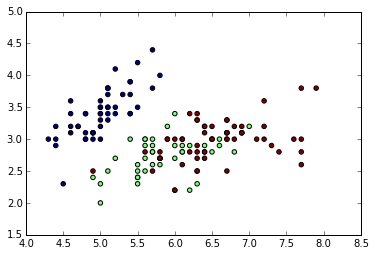

In [18]:
# Plotting just the 1st two dimensions (Petal len and width)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=Y) # X axis is col 1, Y is col 2, color is target
plt.show()

Blue is separate. Green and red are close together, but the other dimensions might help us differentiate them.
Machine learning is about figuring out all this automatically.

The simple way to turn **categorical feature** into numerical features suitable for machine learning is to create new features for each distinct color name that can be valued to 1.0 if the category is matching or 0.0 if not.

The enriched iris feature set would hence be in this case:

sepal length in cm  
sepal width in cm  
petal length in cm  
petal width in cm  
color#purple (1.0 or 0.0)  
color#blue (1.0 or 0.0)  
color#red (1.0 or 0.0)  

Extracting features from unstructured data
http://www.astroml.org/sklearn_tutorial/general_concepts.html

Supervised - Classification (discrete labels) and Regression (continuous labels)  
Unsupervised - Exploratory. tasks such as dimensionality reduction, clustering, and density estimation. visualize the four-dimensional dataset in two dimensions, etc


Scikit-learn workflow -  
transform -> fit -> predict

####Classification example - Linear SVM

In [20]:
X.shape

(150, 4)

In [21]:
Y.shape

(150,)

In [22]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

In [23]:
clf.fit(X,Y) # Training

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

In [40]:
clf.coef_  # Coefficient of the features in the decision function
# This is for multiclass classification; for the binary case, you should use clf.coef_[0] only. 

array([[ 0.18424312,  0.45123116, -0.80793788, -0.45071819],
       [ 0.05186721, -0.89494015,  0.40587028, -0.93867329],
       [-0.85080647, -0.9866516 ,  1.381029  ,  1.86534413]])

In [38]:
clf.intercept_ # bias

array([ 0.10956086,  1.67269073, -1.7097167 ])

In [27]:
# New test instance
X_new = np.asarray([5.0, 3.6, 1.3, 0.25])
X_new.shape

(4,)

In [28]:
X_new = np.asarray([[5.0, 3.6, 1.3, 0.25]])
X_new.shape

(1, 4)

In [29]:
clf.predict(X_new)

array([0])

In [31]:
iris.target_names[clf.predict(X_new)]

array(['setosa'], 
      dtype='<U10')

In [34]:
print(clf.coef_.shape)
print(clf.intercept_.shape)

(3, 4)
(3,)


###Probabilities of outcome - Logisitic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression().fit(X,Y)
clf2.predict_proba(X_new)

array([[  9.07512928e-01,   9.24770379e-02,   1.00343962e-05]])

So there is a 90% chance that the new test sample is a setosa.
This is what the predict function would return.

In [42]:
clf2.predict(X_new)

array([0])

sklearn.linear_model.LogisticRegression  
sklearn.svm.LinearSVC (liblinear)  
sklearn.svm.SVC (libsvm)  
sklearn.linear_model.SGDClassifier (Stochastic Gradient Descent)  
sklearn.neighbors.NeighborsClassifier (k-Nearest Neighbors)  
sklearn.naive_bayes.GaussianNB (Naive Bayes)  

**Uses**
Email, language, news articles, face, voice, sentiment classifications

Predict value of continuously varying variable - Regression

sklearn.linear_model.Ridge  
sklearn.linear_model.ElasticNet  
sklearn.linear_model.LassoLARS  
sklearn.linear_model.SGDRegressor  
sklearn.linear_model.ARDRegression  
sklearn.svm.SVR  
sklearn.ensemble.RandomForestRegressor  


###Unsupervised

####Principal Component Analysis

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True).fit(X) # Transforming input into 2 dimensional space

In [47]:
print(pca.components_)
pca.components_.shape

[[ 0.17650757 -0.04015901  0.41812992  0.17516725]
 [-1.33840478 -1.48757227  0.35831476  0.15229463]]


(2, 4)

Percentage of variance explained by the two components -

In [49]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

In [52]:
pca.explained_variance_ratio_.sum()

0.97763177502480336

In [53]:
X_pca = pca.transform(X)  # Transform data into 2 dimensions
X_pca.shape

(150, 2)

The dataset has been normalized, with mean zero and unit variance

In [55]:
np.round(X_pca.mean(axis=0))

array([-0.,  0.])

In [58]:
np.round(X_pca.std(axis=0))

array([ 1.,  1.])